In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

from utils import summarize_df, plot_signals_p_value, plot_signals_auc, plot_signals_gini, plot_conf_int, plot_correction
from statsmodels.stats.multitest import multipletests

In [2]:
infections = pd.read_csv('epi_data_age_gender.csv')
healthy_idxs = list(infections[infections.Group == 'HC'].ID)
inf_idxs = list(infections[(infections.Group != 'HC') & (infections.Infection == 'Yes')].ID)
data = pd.read_excel('S1File.xlsx', sheet_name = 'CFS_JPT_Seroarray')
data = data.iloc[1254:1270]
data = data[list(data.columns[:8])+healthy_idxs+inf_idxs]

# Signals

In [3]:
smr, all_lower_bounds, all_p_values, auc, gini = summarize_df(data, 8, 58)

**Chi-squared**

In [4]:
smr_p_value = smr[['name', 'min_p_value', 'test_lower_bound', 'test_upper_bound']]
smr_p_value.columns = ['ID', 'minimum p-value', 'lower bound', 'upper bound']
smr_p_value.iloc[:, 2:] = np.round(smr_p_value.iloc[:, 2:], 3)
smr_p_value

,ID,minimum p-value,lower bound,upper bound
0,EBNA1_0415 (AG876),0.054151,1008.333,1032.667
1,EBNA1_0415 (B95-8),0.111303,939.000,964.333
2,EBNA1_0419 (AG876),0.026763,780.667,783.667
3,"EBNA1_0419 (B95-8, GD1)",0.018459,985.000,1000.667
4,EBNA1_0423 (AG876),0.094512,821.000,828.500
5,"EBNA1_0423 (B95-8, GD1)",0.011665,905.000,913.000
6,EBNA1_0427 (GD1),0.066203,928.667,976.667
7,"EBNA1_0430 (AG876, B95-8)",0.064985,1000.000,1001.000
8,EBNA1_0431 (GD1),0.001510,933.000,935.333
9,"EBNA1_0434 (AG876, B95-8)",0.002915,923.333,931.333


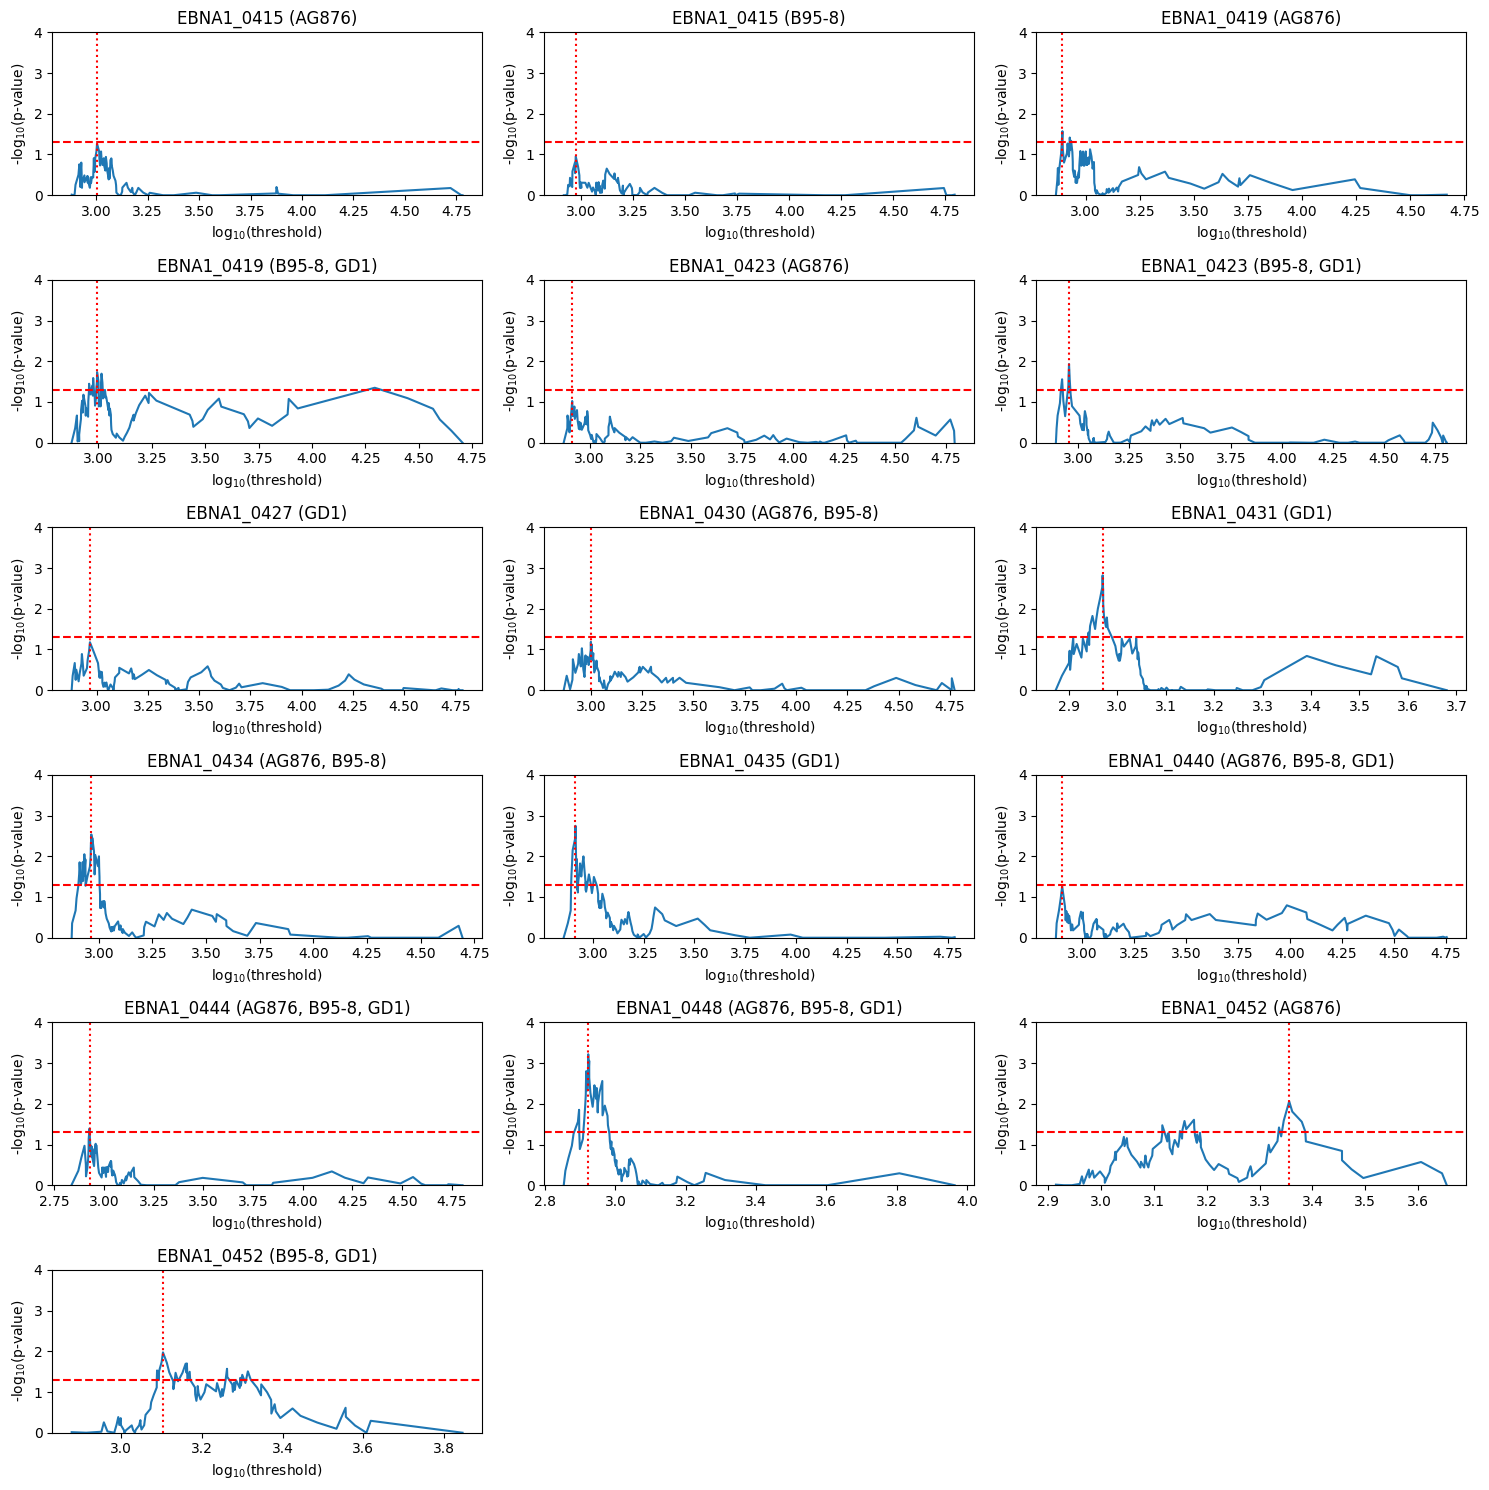

In [5]:
plot_signals_p_value(smr, all_lower_bounds, all_p_values)

**AUC**

In [6]:
smr_auc = smr[['name', 'max_auc', 'auc_lower_bound', 'auc_upper_bound']]
smr_auc.columns = ['ID', 'maximum AUC', 'lower bound', 'upper bound']
smr_auc.iloc[:, 2:] = np.round(smr_auc.iloc[:, 2:], 3)
smr_auc

,ID,maximum AUC,lower bound,upper bound
0,EBNA1_0415 (AG876),0.601111,1008.333,1032.667
1,EBNA1_0415 (B95-8),0.569259,1324.000,1367.000
2,EBNA1_0419 (AG876),0.597037,1047.000,1063.000
3,"EBNA1_0419 (B95-8, GD1)",0.622593,1033.333,1043.333
4,EBNA1_0423 (AG876),0.568519,1257.333,1276.333
5,"EBNA1_0423 (B95-8, GD1)",0.591481,905.000,913.000
6,EBNA1_0427 (GD1),0.572963,928.667,976.667
7,"EBNA1_0430 (AG876, B95-8)",0.587407,1006.667,1009.667
8,EBNA1_0431 (GD1),0.644444,933.000,935.333
9,"EBNA1_0434 (AG876, B95-8)",0.635185,932.333,949.667


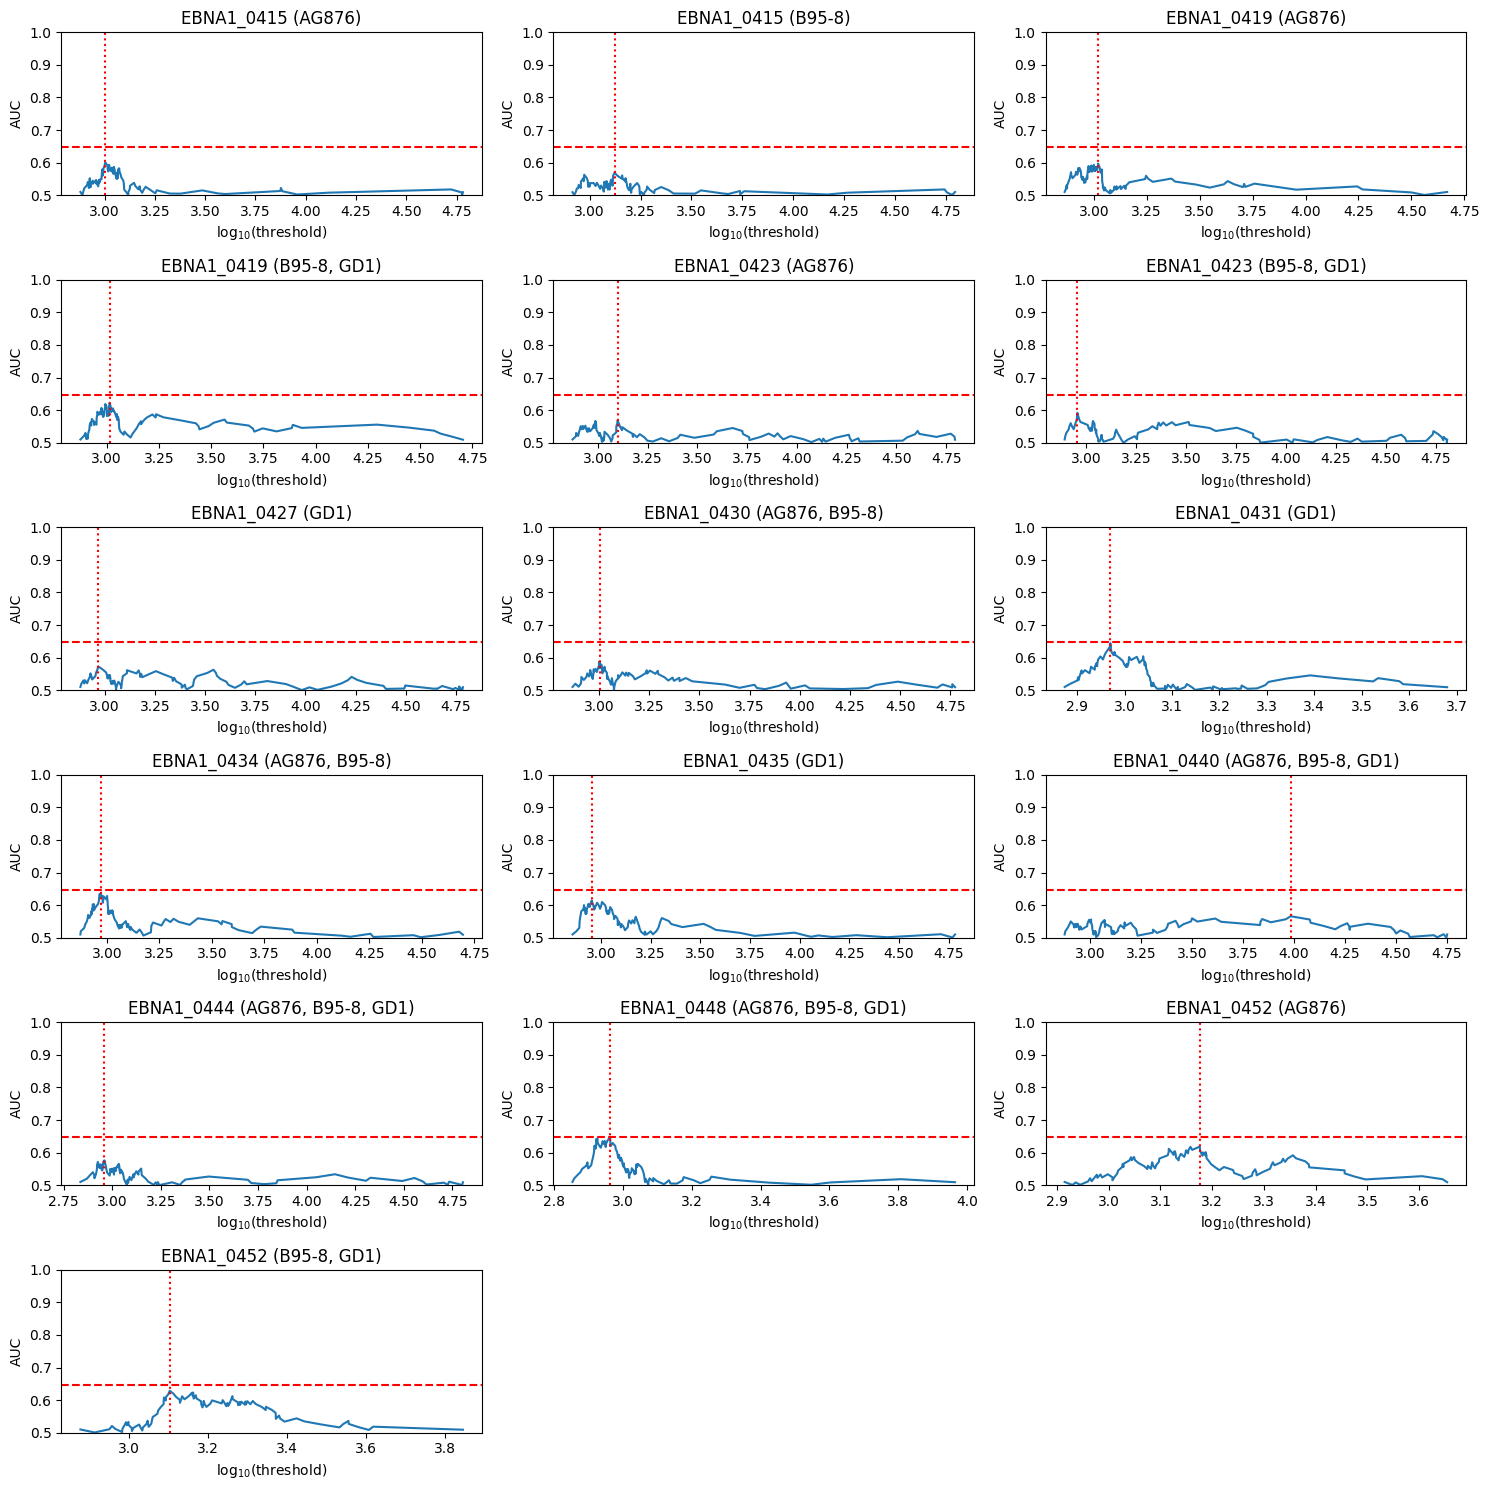

In [7]:
plot_signals_auc(smr, all_lower_bounds, auc)

**Gini decrease**

In [8]:
smr_gini = smr[['name', 'max_gini', 'gini_lower_bound', 'gini_upper_bound']]
smr_gini.columns = ['ID', 'maximum Gini decrease', 'lower bound', 'upper bound']
smr_gini.iloc[:, 2:] = np.round(smr_gini.iloc[:, 2:], 3)
smr_gini

,ID,maximum Gini decrease,lower bound,upper bound
0,EBNA1_0415 (AG876),0.021746,1008.333,1032.667
1,EBNA1_0415 (B95-8),0.016965,939.000,964.333
2,EBNA1_0419 (AG876),0.031559,780.667,783.667
3,"EBNA1_0419 (B95-8, GD1)",0.031558,985.000,1000.667
4,EBNA1_0423 (AG876),0.020445,821.000,828.500
5,"EBNA1_0423 (B95-8, GD1)",0.038145,905.000,913.000
6,EBNA1_0427 (GD1),0.021502,928.667,976.667
7,"EBNA1_0430 (AG876, B95-8)",0.020735,1000.000,1001.000
8,EBNA1_0431 (GD1),0.055473,933.000,935.333
9,"EBNA1_0434 (AG876, B95-8)",0.049348,923.333,931.333


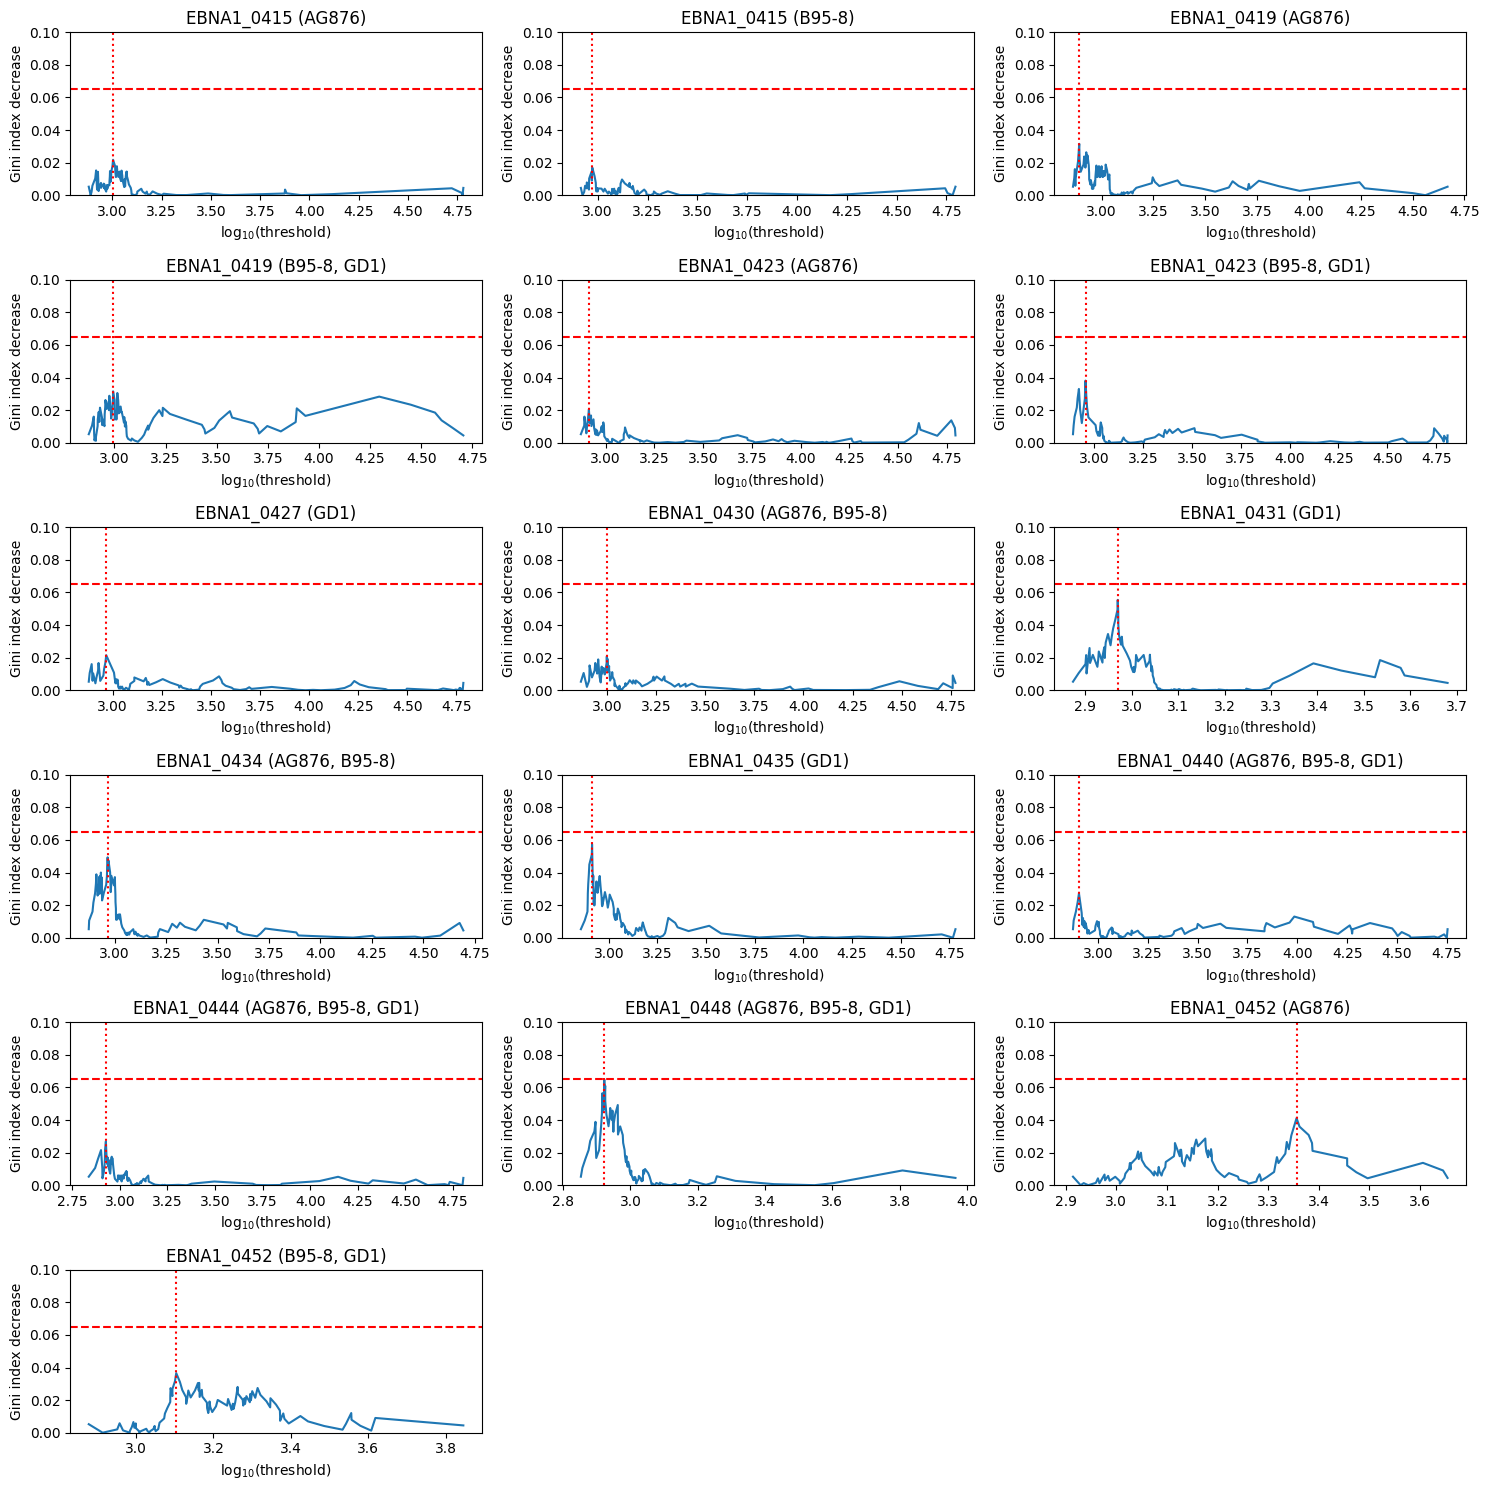

In [9]:
plot_signals_gini(smr, all_lower_bounds, gini)

**Summary of thresholds**

In [10]:
thr_p_value = np.round(smr.test_lower_bound, 2).astype(str) + ' - ' + np.round(smr.test_upper_bound, 2).astype(str)
thr_auc = np.round(smr.auc_lower_bound, 2).astype(str) + ' - ' + np.round(smr.auc_upper_bound, 2).astype(str)
thr_gini = np.round(smr.gini_lower_bound, 2).astype(str) + ' - ' + np.round(smr.gini_upper_bound, 2).astype(str)
pd.DataFrame({'ID': smr.name, 'Chi-squared': thr_p_value, 'AUC': thr_auc, 'Gini': thr_gini})

,ID,Chi-squared,AUC,Gini
0,EBNA1_0415 (AG876),1008.33 - 1032.67,1008.33 - 1032.67,1008.33 - 1032.67
1,EBNA1_0415 (B95-8),939.0 - 964.33,1324.0 - 1367.0,939.0 - 964.33
2,EBNA1_0419 (AG876),780.67 - 783.67,1047.0 - 1063.0,780.67 - 783.67
3,"EBNA1_0419 (B95-8, GD1)",985.0 - 1000.67,1033.33 - 1043.33,985.0 - 1000.67
4,EBNA1_0423 (AG876),821.0 - 828.5,1257.33 - 1276.33,821.0 - 828.5
5,"EBNA1_0423 (B95-8, GD1)",905.0 - 913.0,905.0 - 913.0,905.0 - 913.0
6,EBNA1_0427 (GD1),928.67 - 976.67,928.67 - 976.67,928.67 - 976.67
7,"EBNA1_0430 (AG876, B95-8)",1000.0 - 1001.0,1006.67 - 1009.67,1000.0 - 1001.0
8,EBNA1_0431 (GD1),933.0 - 935.33,933.0 - 935.33,933.0 - 935.33
9,"EBNA1_0434 (AG876, B95-8)",923.33 - 931.33,932.33 - 949.67,923.33 - 931.33


# Confidence intervals

In [11]:
smr_copy = smr[['name', 'proportion_min_g1', 'test_g1_prop_above', 'proportion_max_g1', 'proportion_min_g2', 'test_g2_prop_above', 'proportion_max_g2']]
smr_copy.columns = ['ID', 'healthy (min)', 'healthy (mean)', 'healthy (max)', 'CFS - infected (min)', 'CFS - infected (mean)', 'CFS - infected (max)']
smr_copy.iloc[:, 1:] = np.round(smr_copy.iloc[:, 1:], 2)
smr_copy

,ID,healthy (min),healthy (mean),healthy (max),CFS - infected (min),CFS - infected (mean),CFS - infected (max)
0,EBNA1_0415 (AG876),0.38,0.52,0.66,0.60,0.72,0.84
1,EBNA1_0415 (B95-8),0.69,0.80,0.91,0.86,0.93,1.00
2,EBNA1_0419 (AG876),0.74,0.84,0.94,0.95,0.98,1.00
3,"EBNA1_0419 (B95-8, GD1)",0.40,0.54,0.68,0.67,0.78,0.89
4,EBNA1_0423 (AG876),0.79,0.88,0.97,0.95,0.98,1.00
5,"EBNA1_0423 (B95-8, GD1)",0.67,0.78,0.89,0.91,0.96,1.00
6,EBNA1_0427 (GD1),0.67,0.78,0.89,0.86,0.93,1.00
7,"EBNA1_0430 (AG876, B95-8)",0.55,0.68,0.81,0.76,0.85,0.95
8,EBNA1_0431 (GD1),0.46,0.60,0.74,0.81,0.89,0.97
9,"EBNA1_0434 (AG876, B95-8)",0.49,0.62,0.75,0.81,0.89,0.97


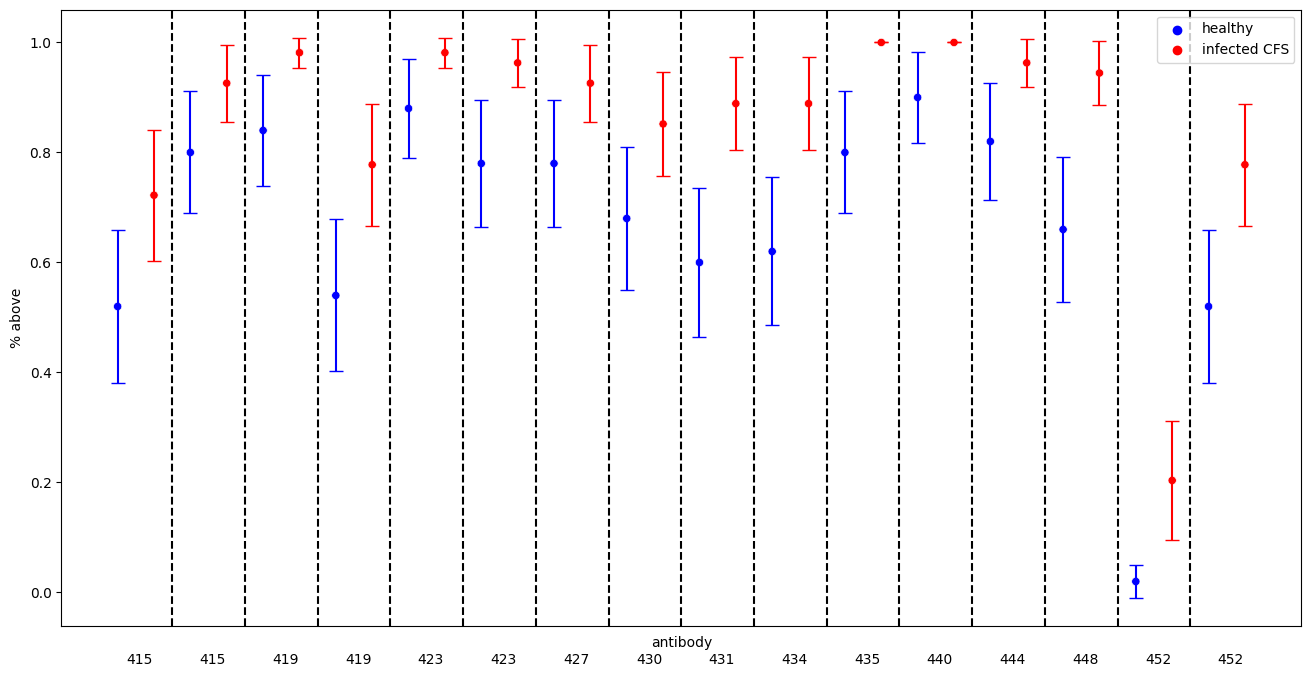

In [12]:
plot_conf_int(smr, 'healthy', 'infected CFS')

# Multiple testing correction

In [13]:
ag876 = 'FEYHQEGGPDGEPDMPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWYG'
ag876_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
ag876_target = 16
b958 = 'FEYHQEGGPDGEPDVPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWFG'
b958_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
b958_target = 16
gd1 = 'QEGGPDGEPDVPPGAIEQGPTDDPGEGPSTGPRGQGDGGRRKKGGWFG'
gd1_stop = [15, 19, 23, 27, 31, 36, 40, 44, 48]
gd1_target = 12

In [14]:
adj_p_values_bonf = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'bonferroni')[1])
adj_p_values_bh = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_bh')[1])
adj_p_values_by = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_by')[1])
adj_p_values_bky = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_tsbky')[1])

In [15]:
adj_p_values = [adj_p_values_bonf, adj_p_values_bh, adj_p_values_by, adj_p_values_bky]
correction_types = ['Bonferroni' ,'Benjamini-Hochberg', 'Benjamini-Yekutieli', '2-stage Benjamini-Krieger-Yekutieli']
strains = ['AG876', 'B95-8', 'GD1']
strain_seqs = [ag876, b958, gd1]
strain_stops = [ag876_stop, b958_stop, gd1_stop]
strain_targets = [ag876_target, b958_target, gd1_target]

In [16]:
pvals = np.round(pd.DataFrame({k:v for k,v in zip(correction_types, adj_p_values)}), 3)
pvals.insert(0, 'ID', smr.name)
pvals

,ID,Bonferroni,Benjamini-Hochberg,Benjamini-Yekutieli,2-stage Benjamini-Krieger-Yekutieli
0,EBNA1_0415 (AG876),0.062,1.139,0.610,1.477
1,EBNA1_0415 (B95-8),-0.000,0.953,0.424,1.291
2,EBNA1_0419 (AG876),0.368,1.323,0.794,1.660
3,"EBNA1_0419 (B95-8, GD1)",0.530,1.433,0.904,1.771
4,EBNA1_0423 (AG876),-0.000,0.996,0.467,1.334
5,"EBNA1_0423 (B95-8, GD1)",0.729,1.574,1.045,1.912
6,EBNA1_0427 (GD1),-0.000,1.121,0.592,1.459
7,"EBNA1_0430 (AG876, B95-8)",-0.000,1.121,0.592,1.459
8,EBNA1_0431 (GD1),1.617,2.021,1.492,2.359
9,"EBNA1_0434 (AG876, B95-8)",1.331,1.933,1.404,2.271


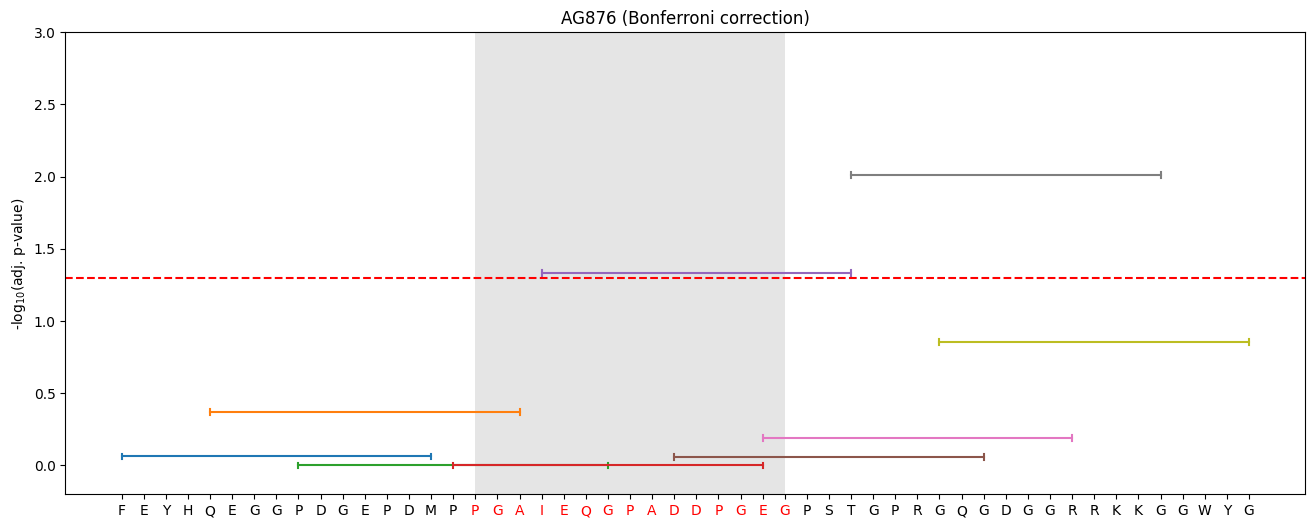

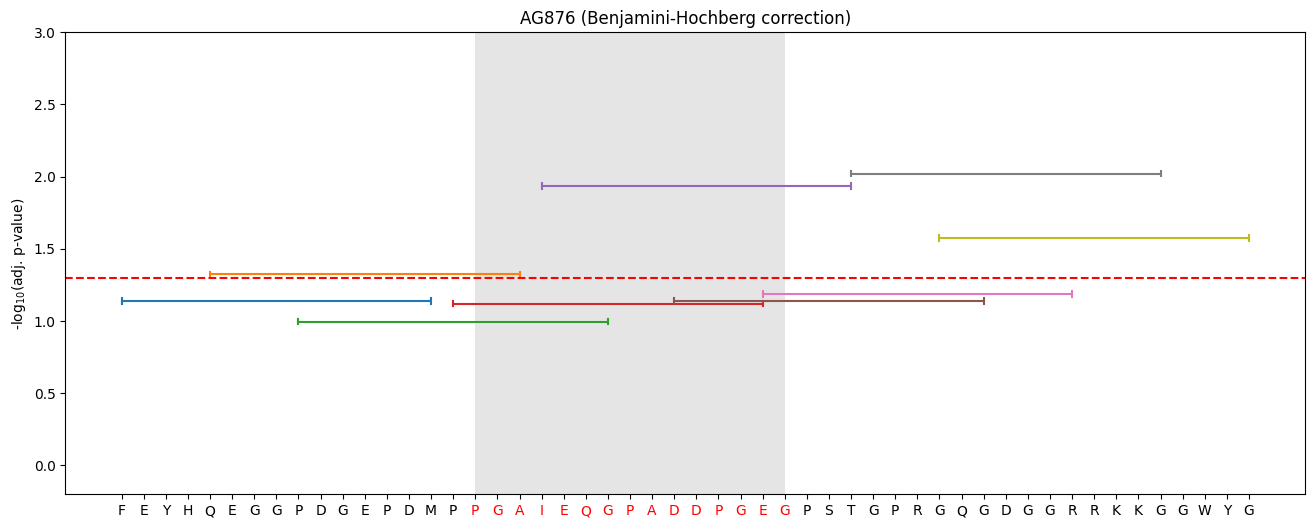

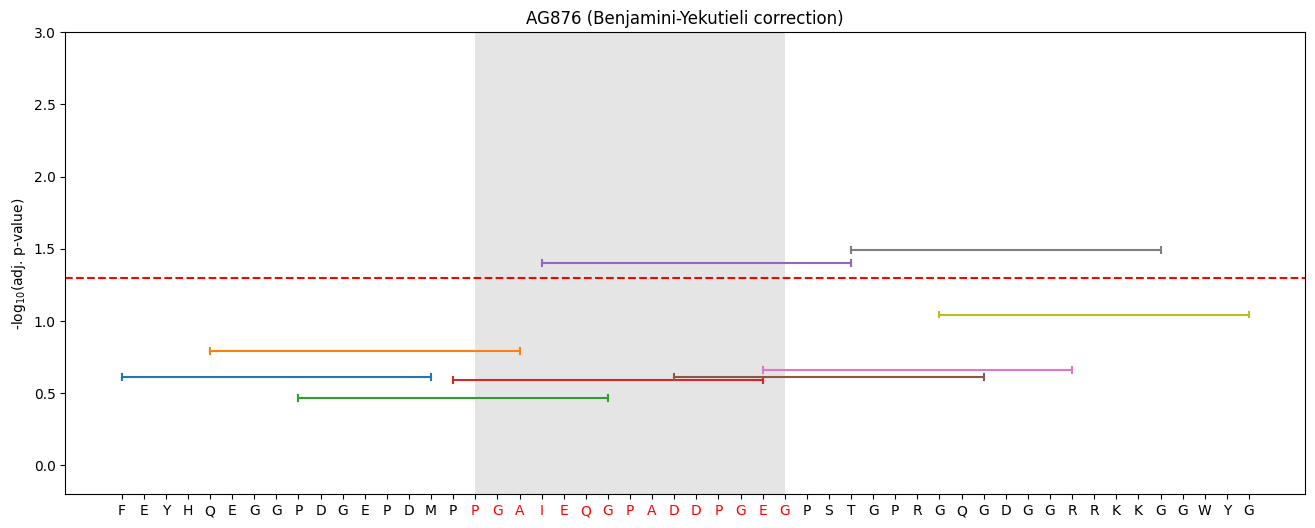

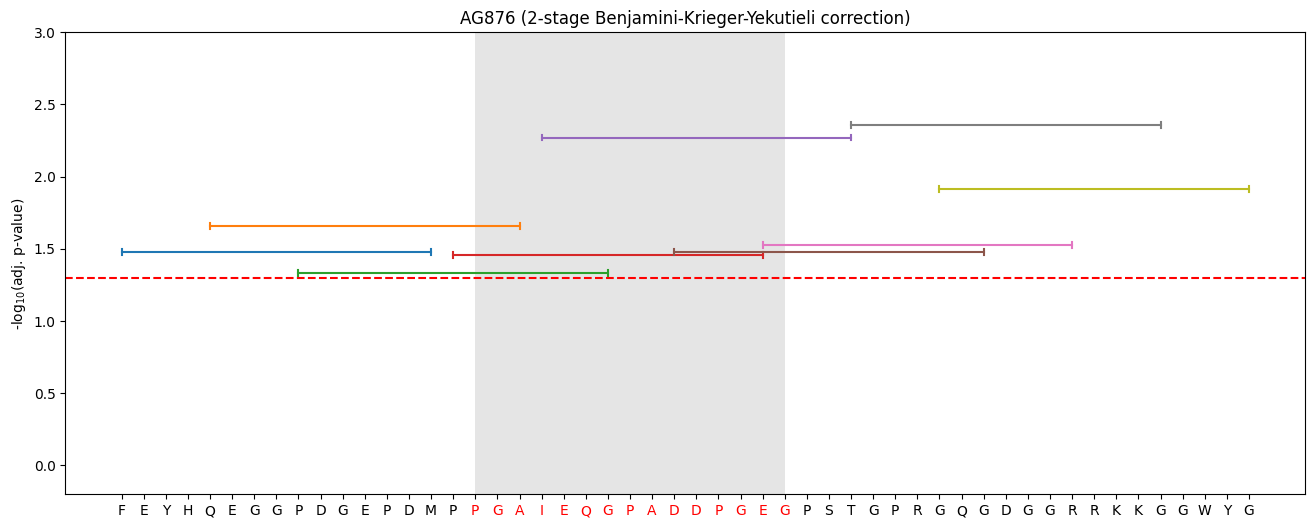

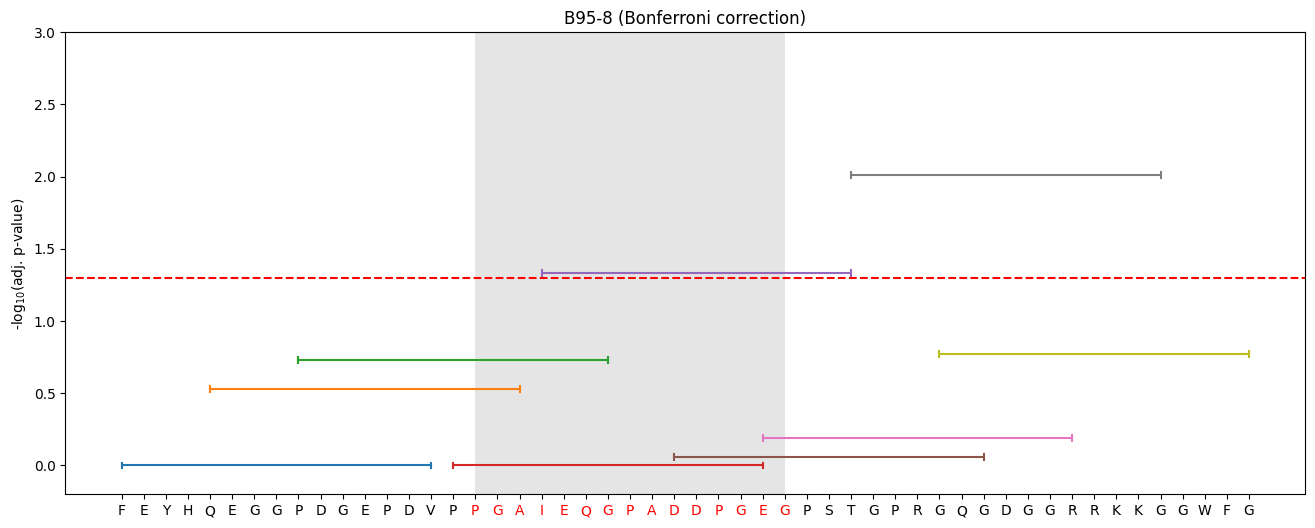

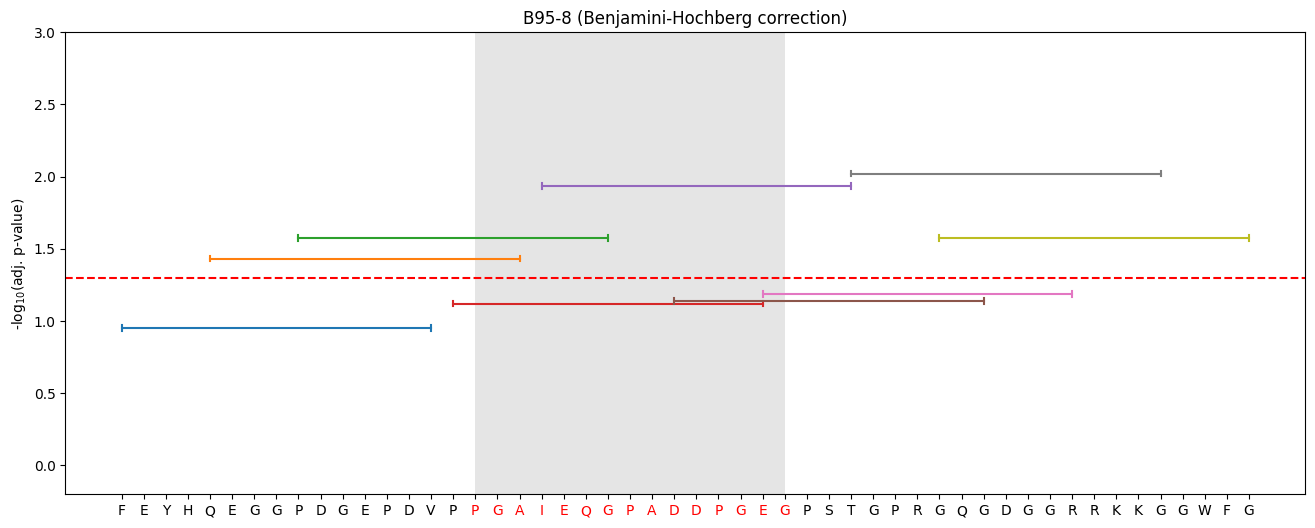

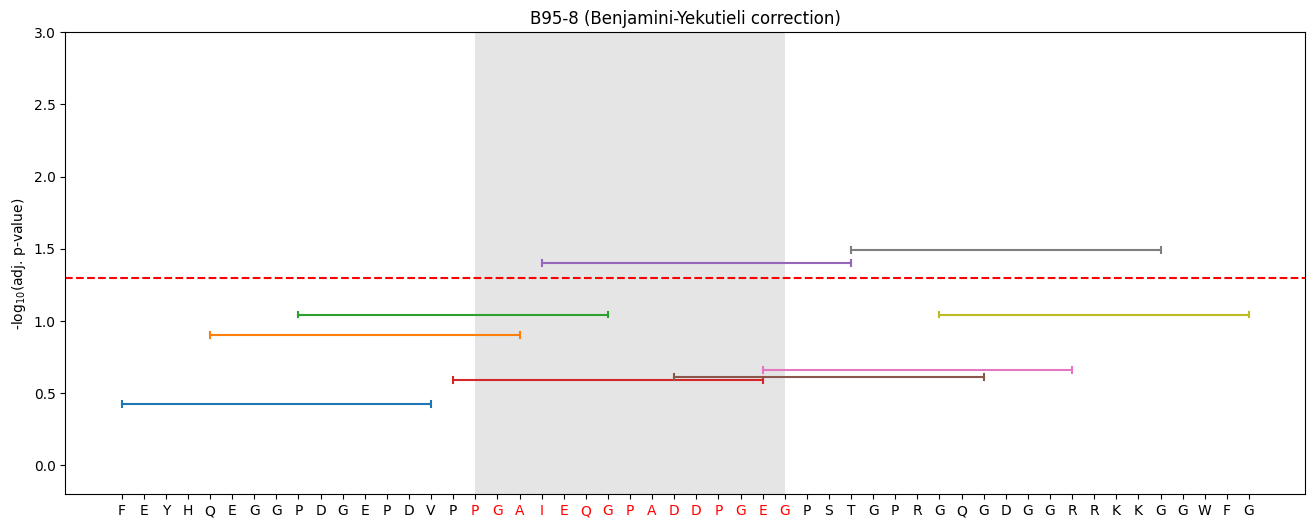

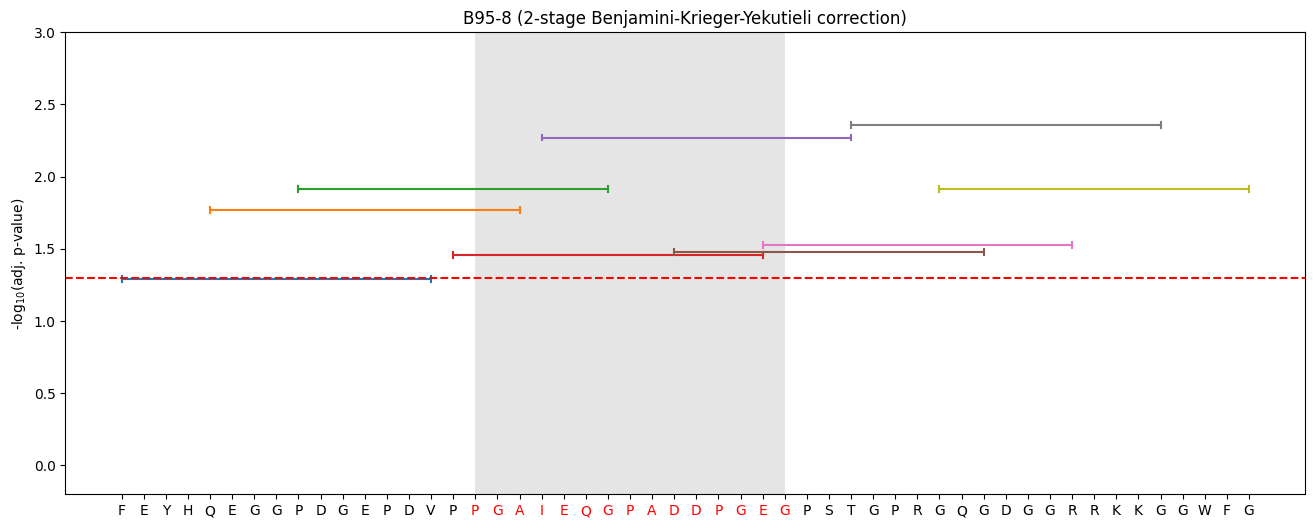

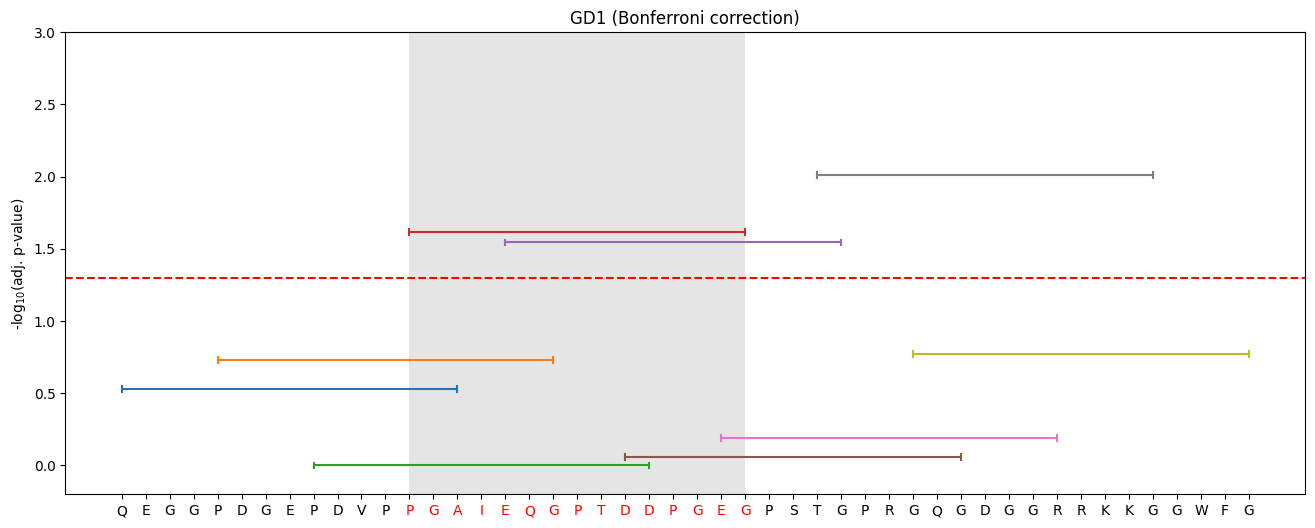

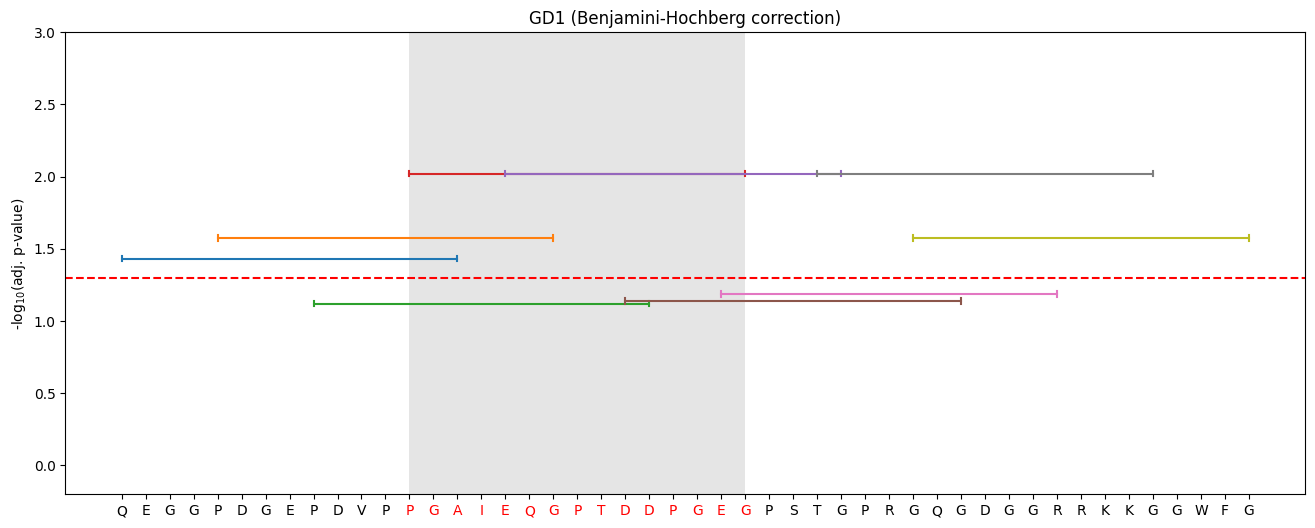

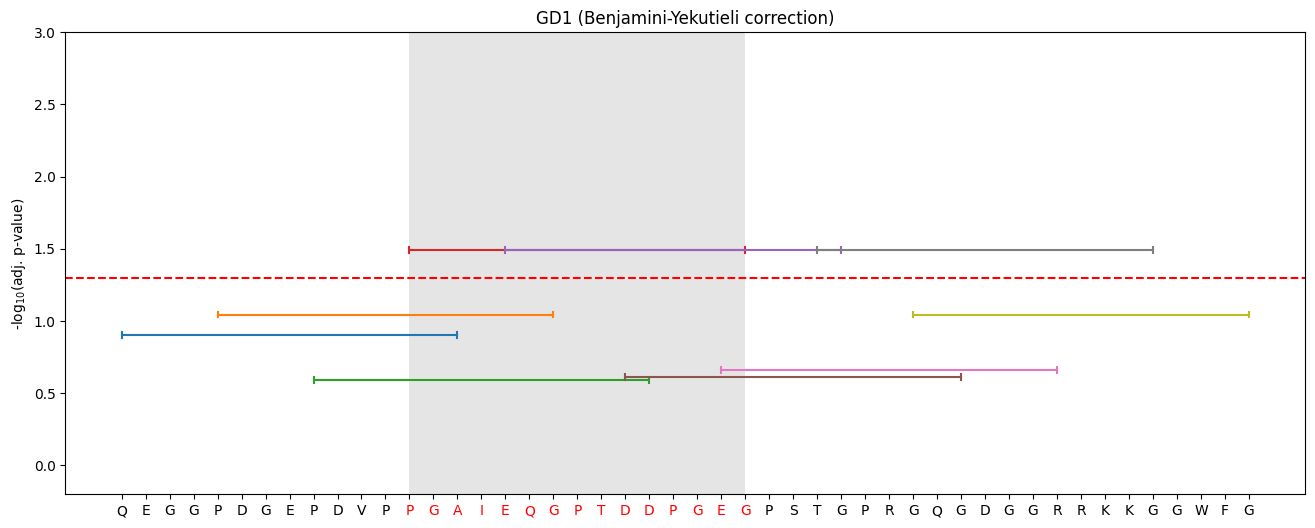

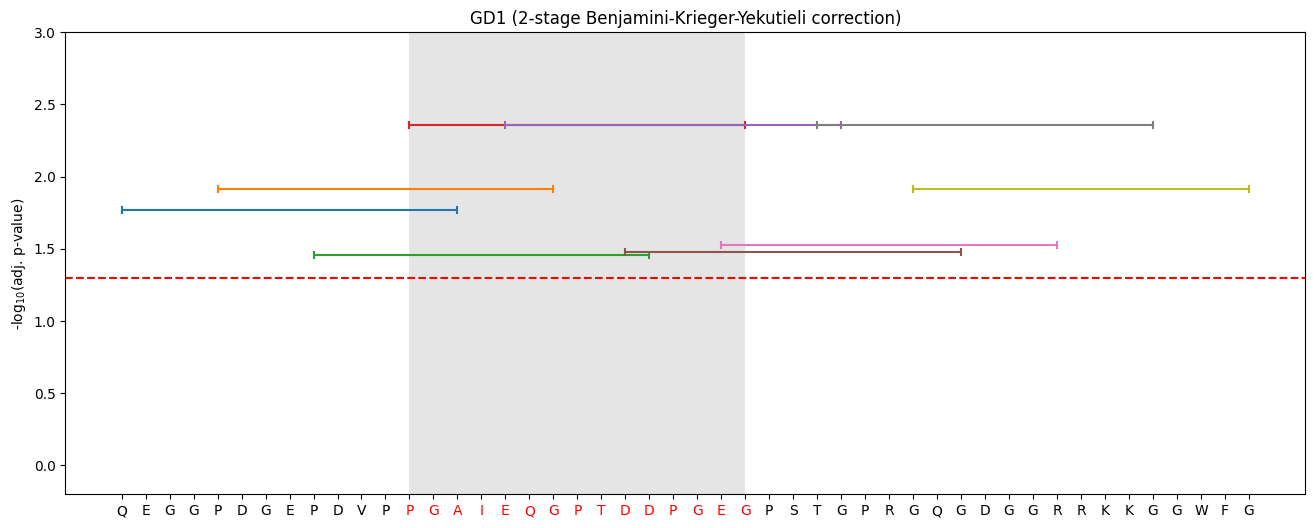

In [17]:
for j in range(len(strains)):
    for i in range(len(correction_types)):
        plot_correction(smr.groups, adj_p_values[i], correction_types[i], strains[j], strain_seqs[j], strain_stops[j], strain_targets[j])